# Diabetes Predicition Model

Importing all the relevent libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline

Setting the style for all the plots thats we will be analysing 

In [2]:
sns.set_style('whitegrid')

Importing the data in a dataframe

In [3]:
data = pd.read_csv('../input/diabetes-dataset/diabetes2.csv')

Checking the first 5 rows of the data: We have 8 independent columns and 1 dependent column in the dataset

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking types of the features : All columns are numerical in natures with no missing values 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Creating a pairplot to see the distribution of all features and comparing them

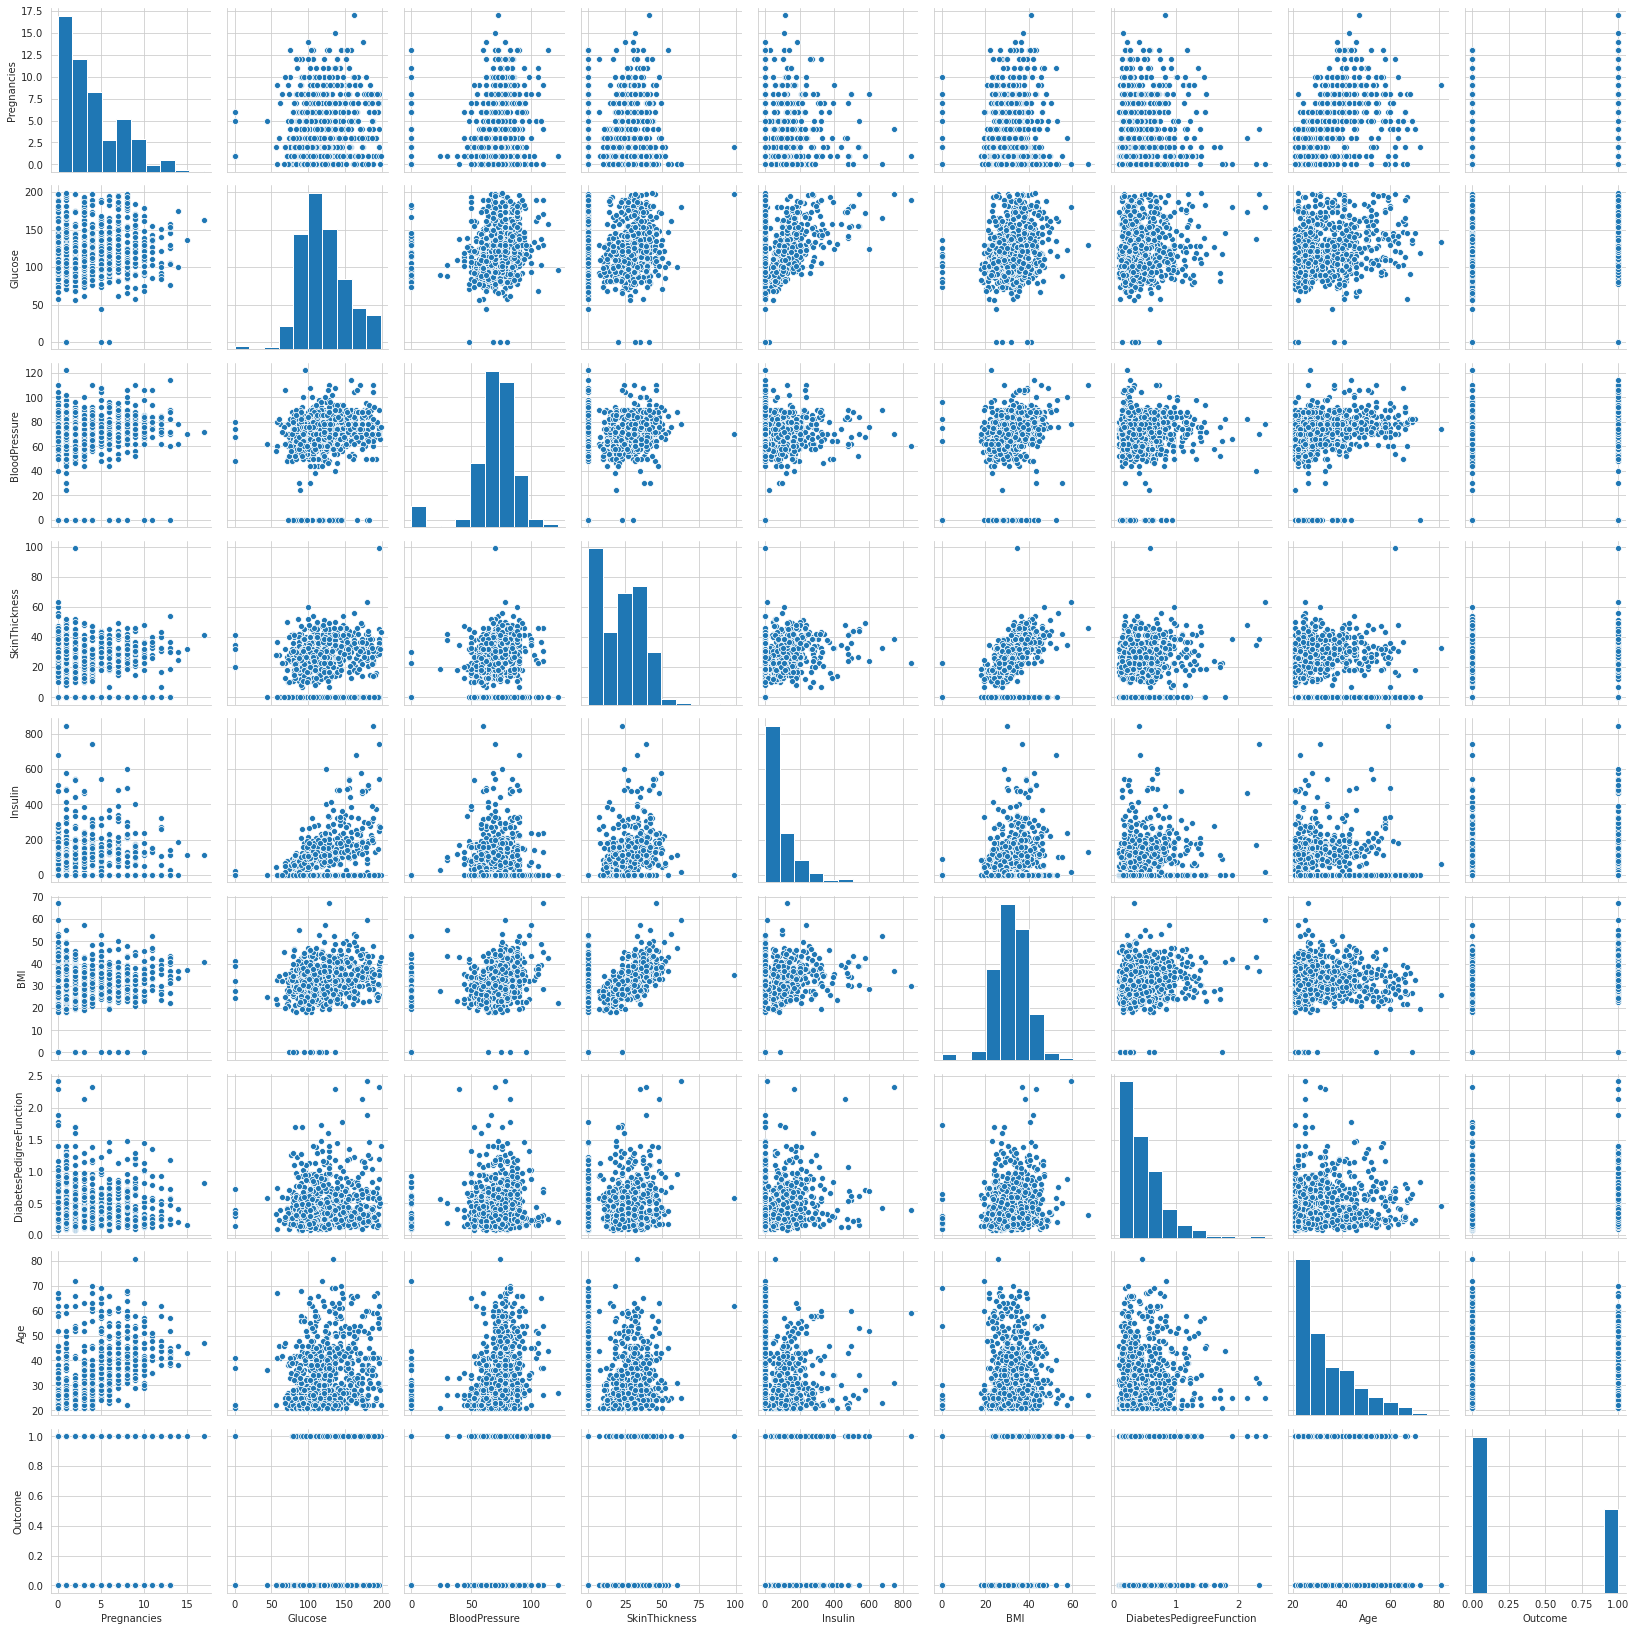

In [6]:
sns.pairplot(data)

Check for null values: There is no null values 

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can also see though the heamap below that there is no missing value, in case there were it will be highlighed by yellow color corresponsing to features

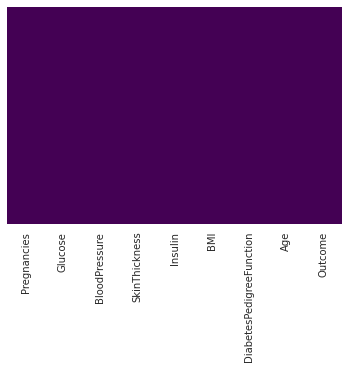

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Distibution of BMI: Normal

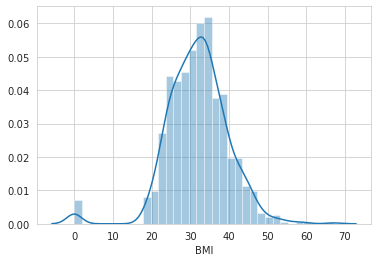

In [9]:
sns.distplot(data['BMI'])

Distribution of SkinThickness: Bimodel and skewed towards right

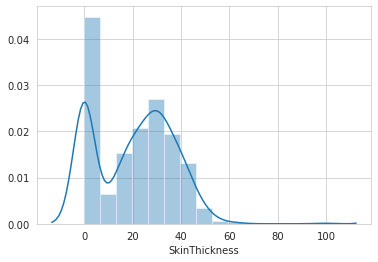

In [10]:
sns.distplot(data['SkinThickness'])

Distribtion of diabetes cases: 0 - No Diabetes | 1 - Diabetes
We can see from the below countplot that our data is not balance which also means we will give more importance to Precision, Recall or F-Value over Accuracy in this case 

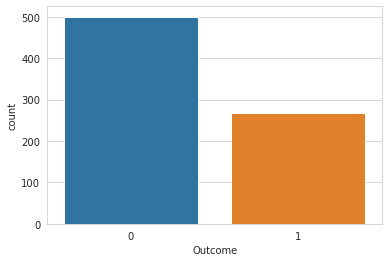

In [11]:
sns.countplot(data['Outcome'])

COrrelation Matrix: All features have some what significant correlation with outcome and also does not look like a case of multicollinearity

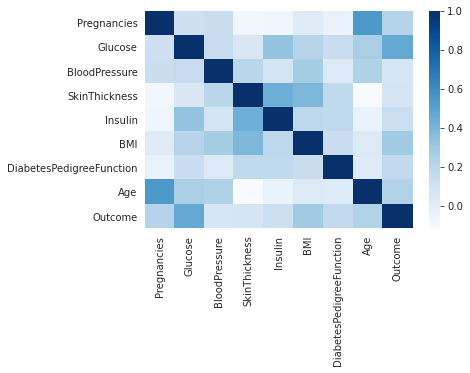

In [12]:
sns.heatmap(data.corr(), cmap='Blues')

Divide the dataset into Train and test

In this case we have 70% of the data to be considered as Training and remaining 30% will used for testing

In [13]:
X = data.drop('Outcome', axis = 1)
y= data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Creating Logistic regression object and fitting/traing the model 

In [14]:
lm = LogisticRegression()

In [15]:
lm.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

Predicting the outcome based on test dataset and storing in the variable 

In [16]:
pred = lm.predict(X_test)

Checking confusing matrix and classification report in order to see how will our model performed on the test datatset

Accounding to these matrics, our model is around 75% successful in predicting the outcome 

In [17]:
confusion_matrix(y_test, pred)

array([[121,  30],
       [ 30,  50]])

In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Standardizing the dataset

We noticed that columns have different range for all independent features are different so we will try to run regression after standarizing the dataset and see if it can improve the model performance

Importing StandardScaler and creating an object of it

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

Standardizing the independent features 

In [21]:
scaler.fit(data.drop('Outcome',axis=1))

StandardScaler()

In [22]:
scaled_features = scaler.transform(data.drop('Outcome',axis=1))

Checking the standard dataframe

In [23]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [24]:
df_feat.shape

(768, 8)

Spliting the dataframe into test and train dataset

In [25]:
S_X_train, S_X_test, S_y_train, S_y_test = train_test_split(scaled_features,data['Outcome'],
                                                    test_size=0.30)

In [26]:
slm = LogisticRegression()

Training the model 

In [27]:
slm.fit(S_X_train, S_y_train)

LogisticRegression()

Predicting based on trained model and storing the outcome in the variable 

In [28]:
predict = slm.predict(S_X_test)

Checking confusing matrix and classification report in order to see how will our model performed on the test datatset

Accounding to these matrics, our model is around 75% successful in predicting the outcome so in this case standardization has not been able to significantly chnage the performance of the model but is a good practice to standized the data

In [29]:
confusion_matrix(S_y_test, predict)

array([[137,  18],
       [ 39,  37]])

In [30]:
print(classification_report(S_y_test, predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       155
           1       0.67      0.49      0.56        76

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



### Conclusion

In the dataset, I tried to predict the occurance of diabetes based on 8 independent variable like BMI, SkinThickeness, Glucose level and other.
I used logistic regresion and conclude that this model is ~ 75% times successfully predicting wheather the patient has diabetes or not